In [1]:
#import libraries
import tensorflow as tf

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
#data preprocessing
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        'Dataset/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 25000 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        'Dataset/test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 5000 images belonging to 2 classes.


In [5]:
#build CNN Model
#initalize
cnn = tf.keras.models.Sequential()

In [6]:
#convolution
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3,
                               activation = 'relu',
                               input_shape = [64,64,3]))

In [7]:
#pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [8]:
#add 1 more layer
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3,
                               activation = 'relu'))

cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [9]:
#flatten
cnn.add(tf.keras.layers.Flatten())

In [10]:
#full connection
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

In [11]:
#output layer
cnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [12]:
#compile the model
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [13]:
#train the model
history = cnn.fit(x = train_generator, validation_data = validation_generator, epochs = 20)

Epoch 1/20
782/782 [==============================] - 135s 171ms/step - loss: 0.6220 - accuracy: 0.6538 - val_loss: 0.5492 - val_accuracy: 0.7160
Epoch 2/20
782/782 [==============================] - 120s 154ms/step - loss: 0.5319 - accuracy: 0.7326 - val_loss: 0.4839 - val_accuracy: 0.7666
Epoch 3/20
782/782 [==============================] - 118s 151ms/step - loss: 0.4877 - accuracy: 0.7650 - val_loss: 0.4650 - val_accuracy: 0.7740
Epoch 4/20
782/782 [==============================] - 118s 151ms/step - loss: 0.4520 - accuracy: 0.7838 - val_loss: 0.4415 - val_accuracy: 0.8010
Epoch 5/20
782/782 [==============================] - 118s 151ms/step - loss: 0.4317 - accuracy: 0.7981 - val_loss: 0.3980 - val_accuracy: 0.8184
Epoch 6/20
782/782 [==============================] - 124s 159ms/step - loss: 0.4091 - accuracy: 0.8108 - val_loss: 0.3638 - val_accuracy: 0.8346
Epoch 7/20
782/782 [==============================] - 120s 154ms/step - loss: 0.3914 - accuracy: 0.8180 - val_loss: 0.3452 -

In [14]:
#single prediction
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("dataset/single/2.jpg", target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
train_generator.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

In [15]:
prediction

'dog'

In [16]:
#multiple prediction
import numpy as np
import os
from keras.preprocessing import image
result_list = []
for test_image in os.scandir("dataset/single"):
    test_image = image.load_img(test_image, target_size = (64,64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image)
    train_generator.class_indices
    if result[0][0] == 1:
        prediction = 'dog'
    else:
        prediction = 'cat'
    result_list.append(prediction)

In [17]:
result_list

['dog',
 'dog',
 'cat',
 'dog',
 'dog',
 'dog',
 'cat',
 'cat',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'cat',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'cat',
 'dog',
 'dog',
 'cat',
 'cat',
 'dog',
 'cat',
 'dog',
 'cat']

In [18]:
import matplotlib.pyplot as plt
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


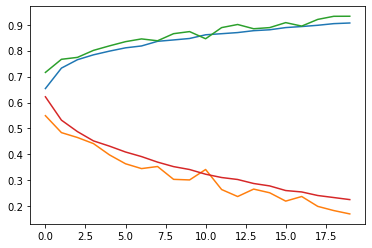

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])